In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import rcParams,font_manager
from matplotlib.ticker import FormatStrFormatter
import pickle
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [3]:
direc = 'G:/My Drive/Bas Games/Analysis/Turing/'
fig_direc = 'G:/My Drive/Bas Games/Figures/'
data=pd.read_csv(direc + 'turing_responses.txt', sep=',',header=0)
movie_stats = pd.read_csv(direc + 'turing_movie_stats.csv')
videoinfo = pd.read_csv(direc + 'videoInfo.csv')


In [33]:
data

,user_name,clip_id,length,choice,feedback,timestamp,is_correct,is_human
0,AF,58,16,24,0,1478100672688,0,True
1,AF,146,1,63,0,1478100685909,0,False
2,AF,168,14,61,0,1478100707442,0,False
3,AF,43,15,42,0,1478100760990,0,True
4,AF,72,12,42,0,1478100797038,0,True
...,...,...,...,...,...,...,...,...
5395,JW2,6,15,79,0,1487288680871,0,False
5396,JW2,96,9,45,0,1487288709048,0,True
5397,JW2,132,20,96,1,1487288734088,1,True
5398,JW2,140,2,40,1,1487288742848,1,False


In [34]:
(0.5*data['choice']==50).mean() + (data['choice']>50).mean()

0.5207407407407407

In [4]:
data['feedback'].mean()

0.5535185185185185

In [5]:
data['is_correct'] = data['feedback']
#data['length'] = np.minimum(data['length'],20)
human_clip_ids = videoinfo[videoinfo['clip_type']==1]['clip_id']
data['is_human'] = data['clip_id'].isin(human_clip_ids)

In [6]:
df = videoinfo[['id_data','length','clip_type','clip_id']].copy()
df['is_human'] = df['clip_type']==1
df['is_correct'] = data.groupby('clip_id')['is_correct'].mean()


In [7]:
df

,id_data,length,clip_type,clip_id,is_human,is_correct
0,0,19,0,0,False,0.633333
1,1,8,0,1,False,0.533333
2,2,7,0,2,False,0.466667
3,3,28,0,3,False,0.400000
4,4,8,0,4,False,0.800000
...,...,...,...,...,...,...
175,179,4,0,175,False,0.666667
176,180,7,0,176,False,0.566667
177,182,10,0,177,False,0.566667
178,186,2,0,178,False,0.466667


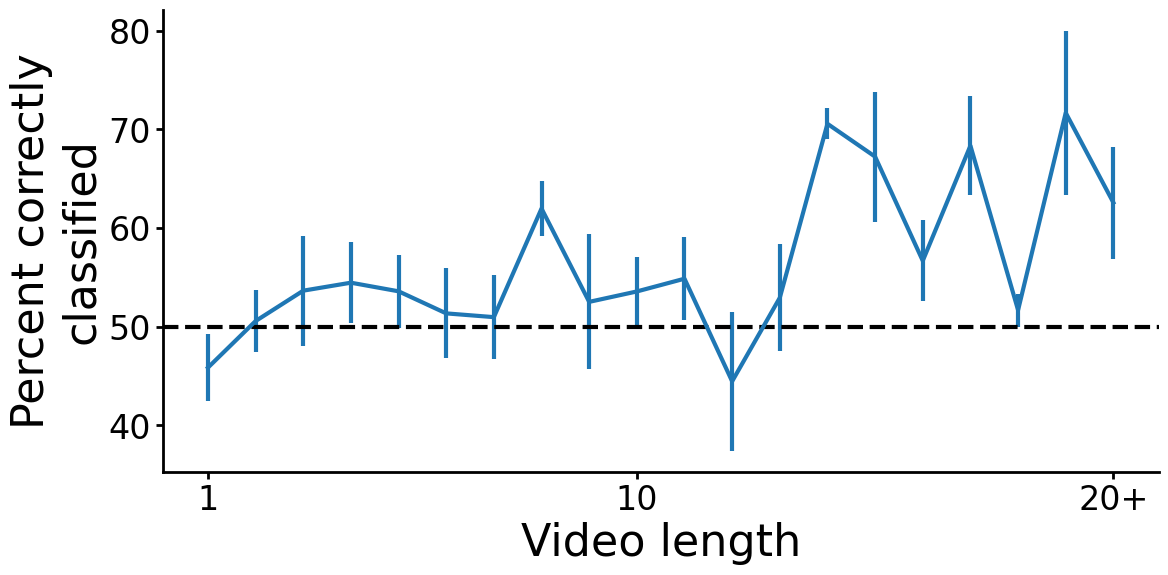

In [8]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.set_xlabel('Video length')
ax.set_ylabel('Percent correctly\nclassified')

df['truncated_length'] = np.minimum(df['length'],20)
ax.errorbar(x=sorted(df['truncated_length'].unique()),
            y=100*df.groupby('truncated_length')['is_correct'].mean(),
            yerr=100*df.groupby('truncated_length')['is_correct'].sem())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axhline(50,linestyle='dashed',color='black')
ax.set_xticks([1,10,20])
ax.set_xticklabels(['1','10','20+'])
fig.subplots_adjust(bottom=0.18,right=0.98,left=0.15,top=0.95)
fig.savefig(fig_direc + 'supp_figure_2A_rev.pdf')
plt.show()

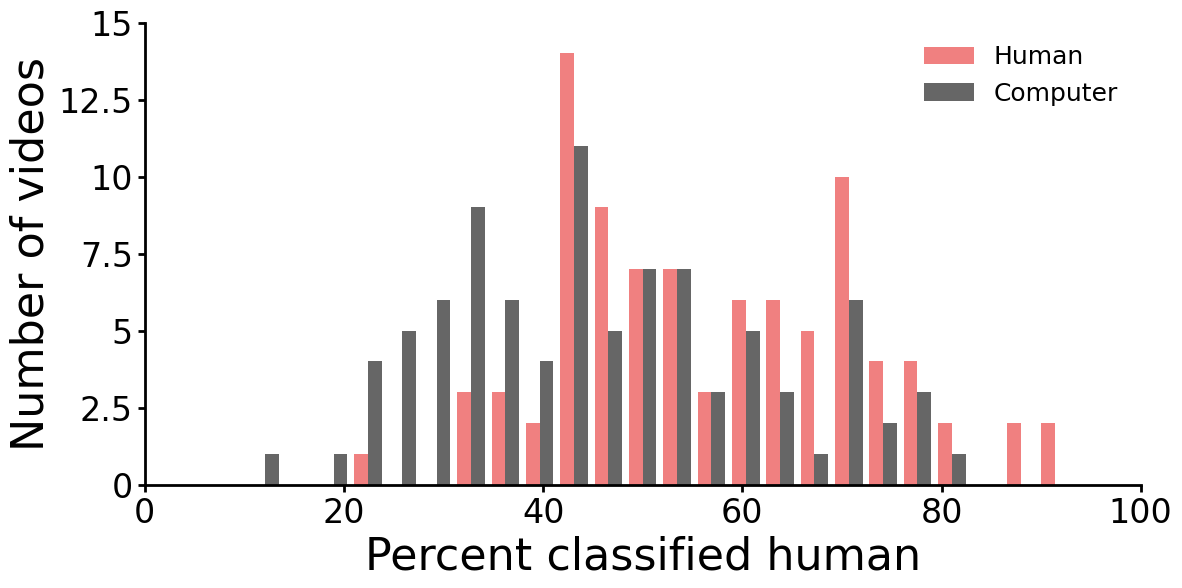

In [9]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))



ax.set_ylabel('Number of videos')
ax.set_xlabel('Percent classified human')

ax.hist([100*df[df['is_human']==1]['is_correct'],100-100*df[df['is_human']==0]['is_correct']],bins=np.linspace(0,100,30),
        label=['Human','Computer'],color=['lightcoral','#666666'])

ax.legend()
ax.set_ylim([0,15])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([0,100])
fig.subplots_adjust(bottom=0.18,right=0.95,left=0.12,top=0.95)
fig.savefig(fig_direc + 'supp_figure_2B_rev.pdf')
plt.show()

In [10]:
df[df['is_correct']==0.5]

,id_data,length,clip_type,clip_id,is_human,is_correct,truncated_length
20,20,2,1,20,True,0.5,2
60,60,16,0,60,False,0.5,16
87,87,10,1,87,True,0.5,10
90,90,4,0,90,False,0.5,4
93,93,5,0,93,False,0.5,5
124,124,5,0,124,False,0.5,5
126,126,18,1,126,True,0.5,18
133,133,2,0,133,False,0.5,2
146,146,1,0,146,False,0.5,1
152,152,13,1,152,True,0.5,13


In [11]:
import statsmodels.formula.api as sm

sm.ols(formula="is_correct ~ length + C(user_name)",data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             is_correct   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.087
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           0.000466
Time:                        14:22:03   Log-Likelihood:                -3856.9
No. Observations:                5400   AIC:                             7776.
Df Residuals:                    5369   BIC:                             7980.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5016      0.038     13.115      0.000       0.427       0.577
C(user_name)[T.AF]     -0.0222      0.052     -0.425      0.671      -0.125       0.080
C(user_name)[T.AJ]      0.0889      0.052      1.701      0.089      -0.014       0.191
C(user_name)[T.AP]      0.0611      0.052      1.170      0.242      -0.041       0.164
C(user_name)[T.AR]      0.0389      0.052      0.744      0.457      -0.064       0.141
C(user_name)[T.ARS]     0.0444      0.052      0.851      0.395      -0.058       0.147
C(user_name)[T.AS]      0.0500      0.052      0.957      0.339      -0.052       0.152
C(user_name)[T.AS2]    -0.0278      0.052     -0.532      0.595      -0.130       0.075
C(user_name)[T.AW]      0.0667      0.052      1.276      0.202      -0.036       0.169
C(user_name)[T.BEN]    -0.0333      0.052     -0.638      0.524      -0.136       0.069
C(user_name)[T.CD]      0.0167      0.052      0.319      0.750      -0.086       0.119
C(user_name)[T.CG]     -0.0944      0.052     -1.808      0.071      -0.197       0.008
C(user_name)[T.CS]      0.0222      0.052      0.425      0.671      -0.080       0.125
C(user_name)[T.CW]      0.0611      0.052      1.170      0.242      -0.041       0.164
C(user_name)[T.DT]      0.0667      0.052      1.276      0.202      -0.036       0.169
C(user_name)[T.DW]      0.0667      0.052      1.276      0.202      -0.036       0.169
C(user_name)[T.DX]      0.0944      0.052      1.808      0.071      -0.008       0.197
C(user_name)[T.EF]      0.0167      0.052      0.319      0.750      -0.086       0.119
C(user_name)[T.GK]     -0.0667      0.052     -1.276      0.202      -0.169       0.036
C(user_name)[T.JW]     -0.0833      0.052     -1.595      0.111      -0.186       0.019
C(user_name)[T.JW2]     0.0222      0.052      0.425      0.671      -0.080       0.125
C(user_name)[T.KB]   2.082e-15      0.052   3.98e-14      1.000      -0.102       0.102
C(user_name)[T.KG]      0.0556      0.052      1.063      0.288      -0.047       0.158
C(user_name)[T.SBJ]     0.0556      0.052      1.063      0.288      -0.047       0.158
C(user_name)[T.SD]     -0.0056      0.052     -0.106      0.915      -0.108       0.097
C(user_name)[T.SJ]      0.0278      0.052      0.532      0.595      -0.075       0.130
C(user_name)[T.SM]      0.0778      0.052      1.489      0.137      -0.025       0.180
C(user_name)[T.TK]      0.0333      0.052      0.638      0.524      -0.069       0.136
C(user_name)[T.TKK]     0.0111      0.052      0.213      0.832      -0.091       0.114
C(user_name)[T.TW]     -0.0389      0.052     -0.744      0.457      -0.141       0.064
length                  0.0033      0.001      3.210      0.001       0.001       0.005
==============================================================================
Omnibus:    

In [12]:
np.max(df['length'])

35

In [13]:
(df['is_correct']<0.5).sum()

63

In [14]:
movie_stats = pd.read_csv(direc + 'turing_movie_stats.csv')
movie_stats = movie_stats.rename(columns = {'lengthPlus1' :'length'})
movie_stats['length'] = movie_stats['length']-1
movie_stats['clip_id'] = movie_stats['id_data'].map(df.set_index('id_data')['clip_id'])

In [15]:
movie_stats = movie_stats.drop('id_data',axis='columns')

In [16]:
black_move = movie_stats['bp'].apply(lambda x: int(x,2)).diff(periods=-1).apply(lambda x: 35-int(np.log2(-x)) if x<0 else -1)
white_move = movie_stats['wp'].apply(lambda x: int(x,2)).diff(periods=-1).apply(lambda x: 35-int(np.log2(-x)) if x<0 else -1)
m = np.maximum(black_move,white_move)
movie_stats['move']=m
movie_stats.loc[movie_stats['mi']==movie_stats['length'],'move']=-1

In [17]:
import matplotlib.patches as patches
import matplotlib.colors as colors

cm = colors.LinearSegmentedColormap.from_list('gray_red_map', [colors.to_rgb('darkgray'), 
                                                            colors.to_rgb('red')], N=100)    

def show_board(bp,wp,response,color,save=False):    
    fig = plt.figure(figsize=[9,4])
    ax = fig.add_subplot(111,aspect='equal')
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
    
    black_pieces = np.nonzero(np.array(list(bp)).astype(int))[0]
    white_pieces = np.nonzero(np.array(list(wp)).astype(int))[0]
    
    for p in black_pieces:
        circ = patches.Circle((p%9,p//9),0.33,color="black",fill=True)
        circ = ax.add_patch(circ)
    for p in white_pieces:
        circ = patches.Circle((p%9,p//9),0.33,color="white",fill=True)
        circ = ax.add_patch(circ)
    for p in [response]:
        circ = patches.Circle((p%9,p//9),0.33,color=color,fill=False)
        circ = ax.add_patch(circ)
    plt.imshow(np.zeros(shape=[4,9]), cmap=cm, 
               interpolation='nearest',origin='lower',vmin=0,vmax=0.2)
    ax.axis('off')
    fig.tight_layout()
    #if save:
    #    fig.savefig('C:/Users/svo/Documents/fmri/Boards/board_' + bp + '_' + wp + '.png')
    plt.show()

In [18]:
fourinarows = np.array([[ 0,  9, 18, 27], #hard-coding all ways in which four-in-a-row can appear
                       [ 1, 10, 19, 28],
                       [ 2, 11, 20, 29],
                       [ 3, 12, 21, 30],
                       [ 4, 13, 22, 31],
                       [ 5, 14, 23, 32],
                       [ 6, 15, 24, 33],
                       [ 7, 16, 25, 34],
                       [ 8, 17, 26, 35],
                       [ 0, 10, 20, 30],
                       [ 1, 11, 21, 31],
                       [ 2, 12, 22, 32],
                       [ 3, 13, 23, 33],
                       [ 4, 14, 24, 34],
                       [ 5, 15, 25, 35],
                       [ 3, 11, 19, 27],
                       [ 4, 12, 20, 28],
                       [ 5, 13, 21, 29],
                       [ 6, 14, 22, 30],
                       [ 7, 15, 23, 31],
                       [ 8, 16, 24, 32],
                       [ 0,  1,  2,  3],
                       [ 1,  2,  3,  4],
                       [ 2,  3,  4,  5],
                       [ 3,  4,  5,  6],
                       [ 4,  5,  6,  7],
                       [ 5,  6,  7,  8],
                       [ 9, 10, 11, 12],
                       [10, 11, 12, 13],
                       [11, 12, 13, 14],
                       [12, 13, 14, 15],
                       [13, 14, 15, 16],
                       [14, 15, 16, 17],
                       [18, 19, 20, 21],
                       [19, 20, 21, 22],
                       [20, 21, 22, 23],
                       [21, 22, 23, 24],
                       [22, 23, 24, 25],
                       [23, 24, 25, 26],
                       [27, 28, 29, 30],
                       [28, 29, 30, 31],
                       [29, 30, 31, 32],
                       [30, 31, 32, 33],
                       [31, 32, 33, 34],
                       [32, 33, 34, 35]],dtype=int)

In [19]:
def create_random_game(bp,wp):
    res = []
    bp = bp.copy()
    wp = wp.copy()
    while not any(np.sum(bp[fourinarows],axis=1)==4) and not any(np.sum(wp[fourinarows],axis=1)==4) and np.sum(bp+wp)<36:
        m = np.random.choice(np.nonzero(np.logical_and(bp==0,wp==0))[0])
        res += [[''.join(bp.astype(str)),''.join(wp.astype(str)),np.sum(bp)==np.sum(wp),m]]
        if np.sum(bp)==np.sum(wp):
            bp[m] = 1
        else:
            wp[m] = 1
        if np.random.uniform()<0.1:
            break
    return res#show_board(''.join(bp.astype(str)),''.join(wp.astype(str)),99,'black')

In [20]:
start_positions_black = movie_stats[(movie_stats['mi']==0) & (movie_stats['clip_id'].isin(human_clip_ids))]['bp'].apply(
    lambda x: np.array(list(x),dtype=int)).values
start_positions_white = movie_stats[(movie_stats['mi']==0) & (movie_stats['clip_id'].isin(human_clip_ids))]['wp'].apply(
    lambda x: np.array(list(x),dtype=int)).values

In [21]:
x = [np.nonzero(np.logical_and(random_games['bp'].values==''.join(bp.astype(str)),
                       random_games['wp'].values==''.join(wp.astype(str))))[0]
        for bp,wp in zip(start_positions_black,start_positions_white)]

iprev=0
for k in range(1,90):
    y = x[k]
    i = y[y>iprev][0]
    random_games.loc[iprev:i,'clip_id'] = k
    random_games.loc[iprev:i,'length'] = i-iprev
    iprev = i
random_games.loc[iprev:,'clip_id'] = 90
random_games.loc[iprev:,'length'] = len(random_games)-iprev
random_games['clip_id']=random_games['clip_id'].astype(int)
random_games['length']=random_games['length'].astype(int)

NameError: name 'random_games' is not defined

In [22]:
random_games

NameError: name 'random_games' is not defined

In [23]:
#random_games = pd.DataFrame(sum([(create_random_game(bp,wp)) 
#                          for bp,wp in zip(start_positions_black,start_positions_white)],[]),columns=['bp','wp','color','move'])

In [467]:
#pd.DataFrame({'bp' : random_games['bp'].apply(lambda x: int(x,2)),
#              'wp' : random_games['wp'].apply(lambda x: int(x,2)),
#              'color' : random_games['color'].apply(lambda x: 'Black' if x else 'White'),
#              'move' :2**(35-random_games['move']),
#             'group' : 0,
#             'rt' : 0,
#             'id' : 0}).to_csv(direc + 'data_tur_random.txt',header=None,index=False,sep='\t',line_terminator='\n')

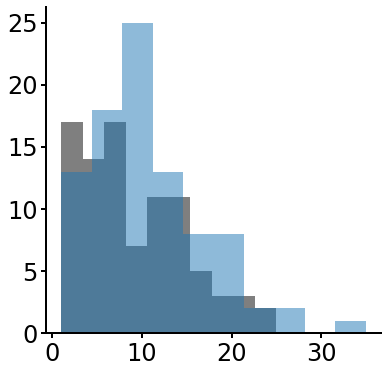

In [470]:
plt.hist([len(create_random_game(bp,wp)) for bp,wp in zip(start_positions_black,start_positions_white)],alpha=0.5,color='black')
plt.hist(movie_stats[(movie_stats['mi']==0) & (movie_stats['clip_id'].isin(human_clip_ids))]['length'],alpha=0.5)
plt.show()

In [469]:
pd.DataFrame({'bp' : movie_stats[movie_stats['move']!=-1]['bp'].apply(lambda x: int(x,2)),
              'wp' : movie_stats[movie_stats['move']!=-1]['wp'].apply(lambda x: int(x,2)),
              'color' : movie_stats[movie_stats['move']!=-1]['pieces'].apply(lambda x: 'Black' if x%2==0 else 'White'),
              'move' :2**(35-movie_stats[movie_stats['move']!=-1]['move']),
             'group' : 0,
             'rt' : 0,
             'id' : 0}).to_csv(direc + 'data_tur.txt',header=None,index=False,sep='\t',line_terminator='\n')

In [521]:
loglik_df = pd.read_csv(direc + 'Turing_logliks.txt',sep='\t',header=None,names=['id','iters','tries','loglik','nleft'])
loglik_df['L'] = loglik_df['tries'].apply(lambda x: np.sum(1/np.arange(1,x)))
movie_stats.loc[movie_stats['move']!=-1,'loglik'] = loglik_df.groupby('id')['L'].mean().values
movie_stats.loc[movie_stats['move']!=-1,'loglik_rand'] = np.log(36-movie_stats[movie_stats['move']!=-1]['pieces'])

In [522]:
loglik_random_df = pd.read_csv(direc + 'Turing_logliks_random.txt',sep='\t',header=None,names=['id','iters','tries','loglik','nleft'])
loglik_random_df['L'] = loglik_random_df['tries'].apply(lambda x: np.sum(1/np.arange(1,x)))
random_games['loglik'] = loglik_random_df.groupby('id')['L'].mean().values
random_games['loglik_rand'] = np.log(38-random_games['bp'].apply(lambda x: len(x.split('1'))) - random_games['wp'].apply(lambda x: len(x.split('1'))))

In [523]:
movie_stats

,mi,length,pieces,bp,wp,clip_id,move,loglik,loglik_rand
0,0,19,0,000000000000000000000000000000000000,000000000000000000000000000000000000,0,19,4.437944,3.583519
1,1,19,1,000000000000000000010000000000000000,000000000000000000000000000000000000,0,13,2.403774,3.555348
2,2,19,2,000000000000000000010000000000000000,000000000000010000000000000000000000,0,7,4.686090,3.526361
3,3,19,3,000000010000000000010000000000000000,000000000000010000000000000000000000,0,10,4.482235,3.496508
4,4,19,4,000000010000000000010000000000000000,000000000010010000000000000000000000,0,12,1.878130,3.465736
...,...,...,...,...,...,...,...,...,...
1863,4,8,5,000000000000010000000011000000000000,000000000000000101000000000000000000,179,21,1.724956,3.433987
1864,5,8,6,000000000000010000000011000000000000,000000000000000101000100000000000000,179,4,2.682082,3.401197
1865,6,8,7,000010000000010000000011000000000000,000000000000000101000100000000000000,179,20,5.049194,3.367296
1866,7,8,8,000010000000010000000011000000000000,000000000000000101001100000000000000,179,31,0.299415,3.332205


In [524]:
random_games

,bp,wp,color,move,loglik,loglik_rand,clip_id,length
0,000000000000100000000010000000010000,000000000000010000000000000000101000,True,25,4.823280,3.401197,1,4
1,000000000000100000000010010000010000,000000000000010000000000000000101000,False,11,4.987272,3.367296,1,4
2,000000000000100000000010010000010000,000000000001010000000000000000101000,True,16,4.027309,3.332205,1,4
3,000000000000100010000010010000010000,000000000001010000000000000000101000,False,33,4.128386,3.295837,1,4
4,100000001001011000000100110000011001,000010100000100111000011000001100010,True,5,4.272195,2.639057,2,8
...,...,...,...,...,...,...,...,...
634,000000100000100000001011000100000000,000010001000000100000000000000100110,True,14,6.735400,3.178054,89,13
635,000000100000101000001011000100000000,000010001000000100000000000000100110,False,13,5.830092,3.135494,89,13
636,000000000001100000000110000000000000,001000000000010000000000000000010000,False,3,2.375716,3.367296,90,3
637,000000000001100000000110000000000000,001100000000010000000000000000010000,True,10,3.990581,3.332205,90,3


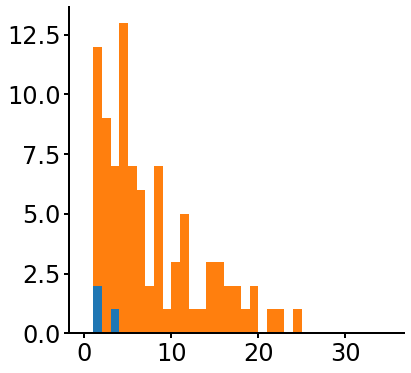

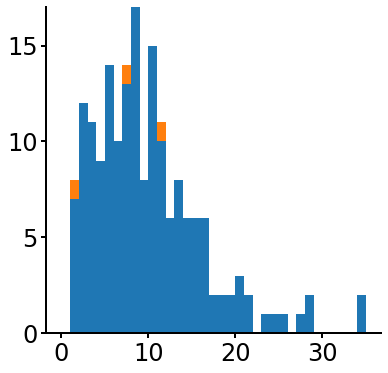

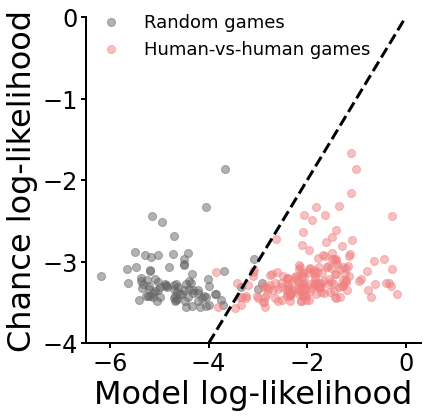

In [525]:
Lmod_random = random_games.groupby('clip_id')['loglik'].mean()
Lrand_random = random_games.groupby('clip_id')['loglik_rand'].mean()
length_random = random_games.groupby('clip_id')['length'].mean()
plt.hist([length_random[Lmod_random<Lrand_random],length_random[Lmod_random>Lrand_random]],stacked=True,bins=np.arange(36))
plt.show()

Lmod_human = movie_stats.groupby('clip_id')['loglik'].mean()
Lrand_human = movie_stats.groupby('clip_id')['loglik_rand'].mean()
length_human = movie_stats.groupby('clip_id')['length'].mean()
plt.hist([length_human[Lmod_human<Lrand_human],length_human[Lmod_human>Lrand_human]],stacked=True,bins=np.arange(36))
plt.show()

plt.plot(-Lmod_random,-Lrand_random,'.',color='#666666',label='Random games',alpha=0.5)
plt.plot(-Lmod_human,-Lrand_human,'.',color='lightcoral',label='Human-vs-human games',alpha=0.5)
plt.plot([-4,0],[-4,0],color='black',linestyle='dashed')
plt.ylim([-4,0])
plt.xlabel('Model log-likelihood')
plt.ylabel('Chance log-likelihood')
plt.legend(loc=(0,0.85))
plt.show()


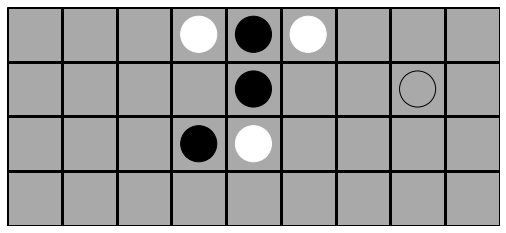

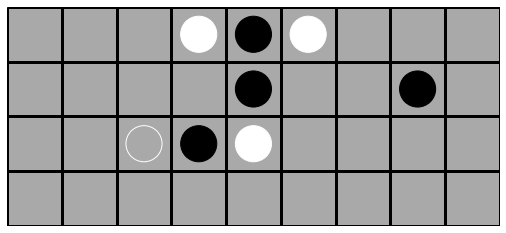

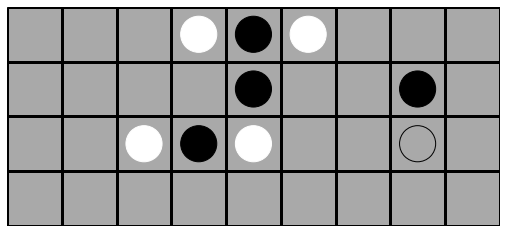

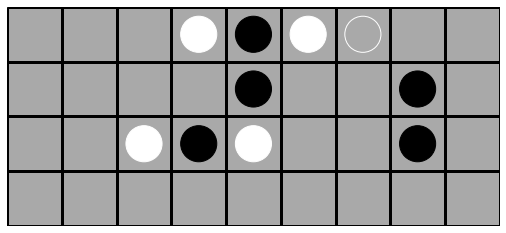

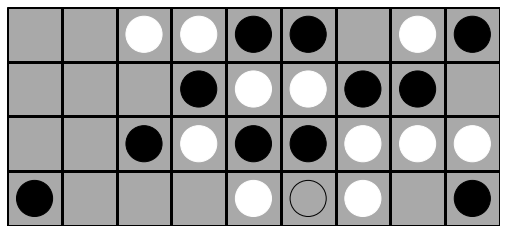

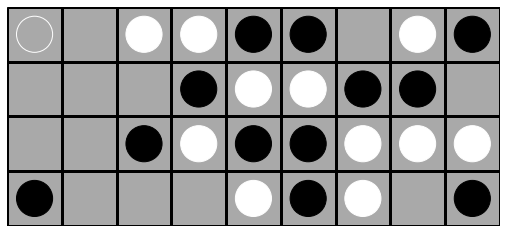

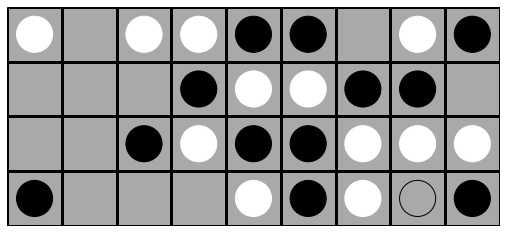

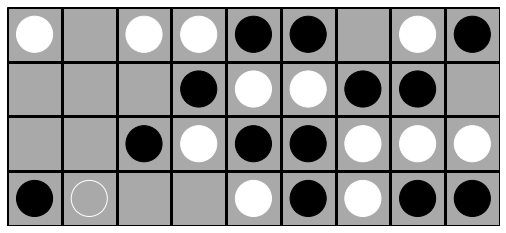

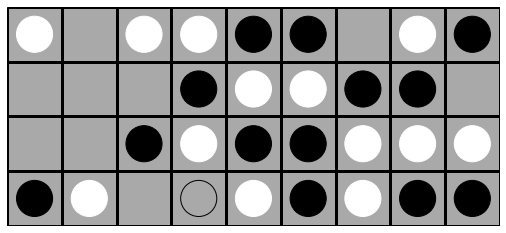

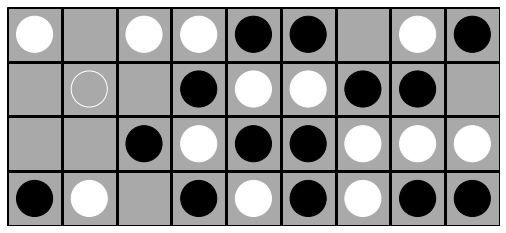

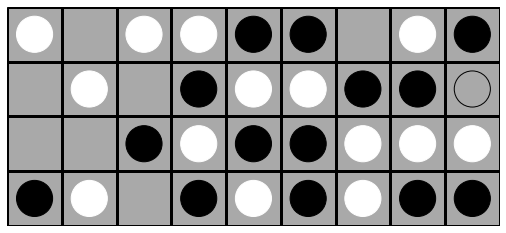

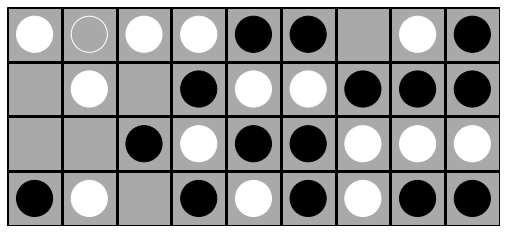

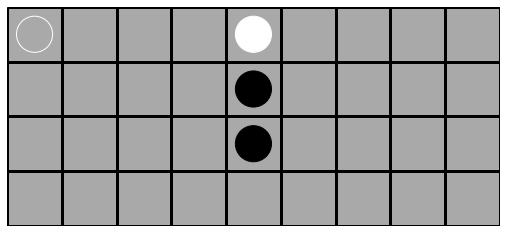

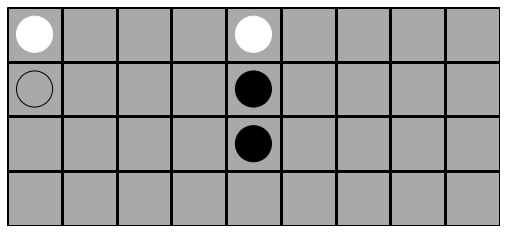

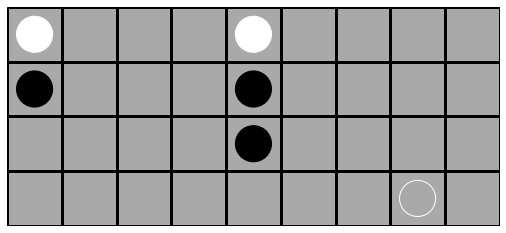

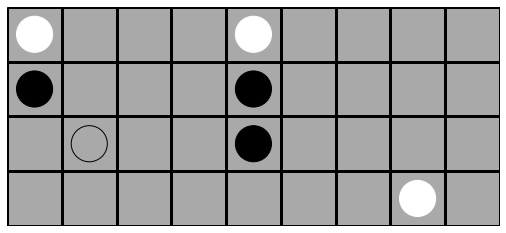

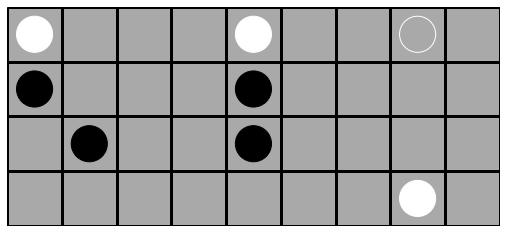

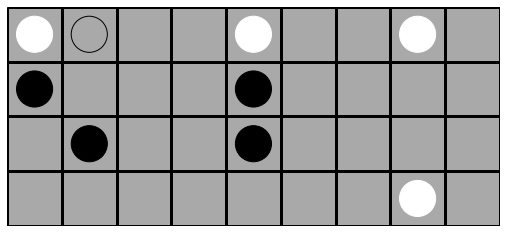

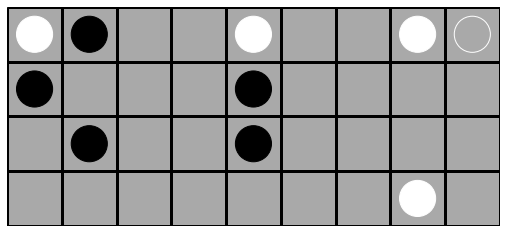

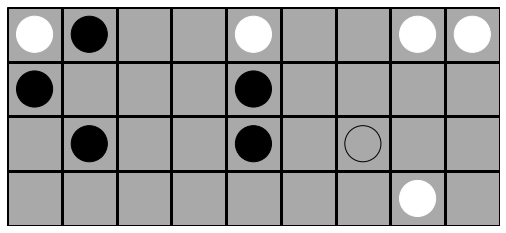

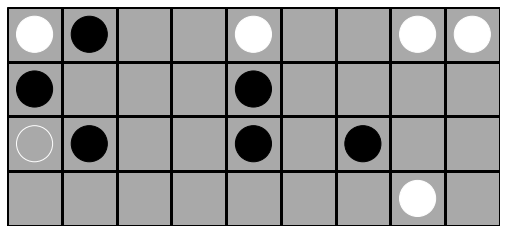

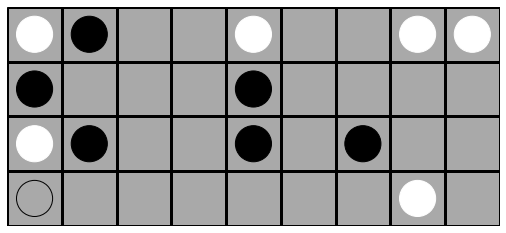

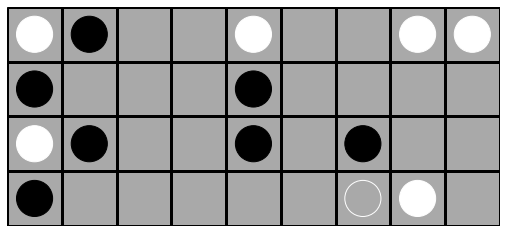

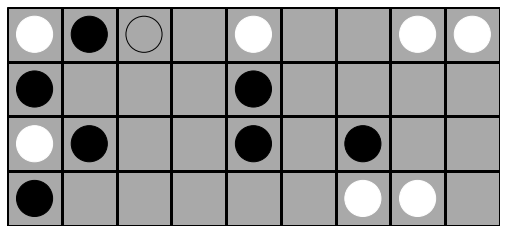

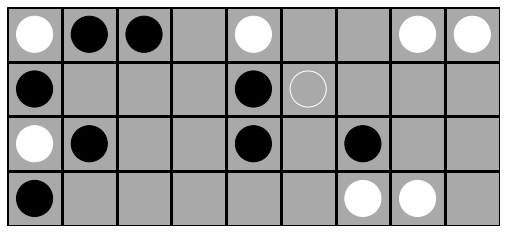

In [526]:
#for i,row in list(movie_stats[movie_stats['move']!=-1].iterrows())[:25]:
for i,row in list(random_games.iterrows())[:25]:
#print(row)
    show_board(row['bp'],row['wp'],row['move'],'black' if row['color'] else 'white')
    #print(np.exp(-row['loglik']))